In [3]:
import pandas as pd
import numpy as np

# Support vector machines

Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection.

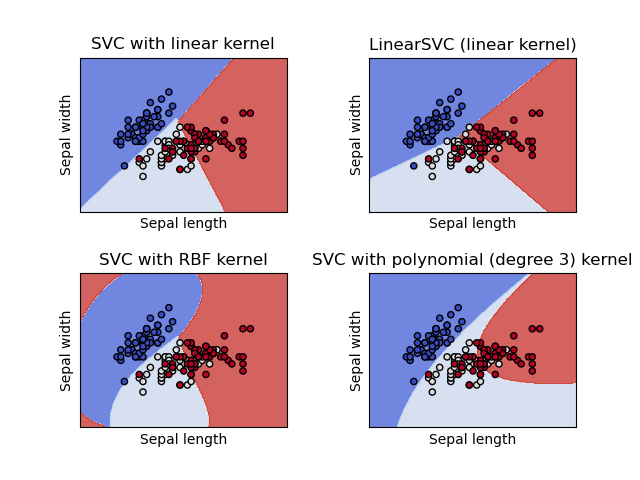

In [4]:
# setting my dataset
data = pd.read_csv('xiamen.tsv', header=None, sep=' ').iloc[:,:-1]
data.rename(columns = {0:'price', 1:'area', 2:'direction', 3:'floor'}, inplace=True)
data.head()

,price,area,direction,floor
0,38161,88.88,1,18
1,38160,89.41,2,18
2,37529,89.41,3,18
3,37529,89.41,4,18
4,36191,79.53,5,18


In [5]:
data.describe()

,price,area,direction,floor
count,280.000000,280.000000,280.000000,280.000000
mean,36678.246429,91.209929,2.985714,12.728571
std,1370.474342,12.054027,1.441752,7.828670
min,33352.000000,79.300000,1.000000,1.000000
25%,35741.000000,88.620000,2.000000,6.000000
50%,36644.500000,89.150000,3.000000,12.000000
75%,37836.250000,89.870000,4.000000,17.000000
max,39211.000000,128.550000,5.000000,31.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   price      280 non-null    int64  
 1   area       280 non-null    float64
 2   direction  280 non-null    int64  
 3   floor      280 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 8.9 KB


In [3]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

### The advantages of support vector machines are:

1. Effective in high dimensional spaces.

2. Still effective in cases where number of dimensions is greater than the number of samples.

3. Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.

4. Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

### The disadvantages of support vector machines include:

1. If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial.

2. SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation (see Scores and probabilities, below).

In [4]:
class mySVM:
    def __init__(self):
        '''
        build model
        '''
        self.clf = SVR(C=1.0,kernel='linear',gamma='auto',max_iter=-1)
        #self.clf = LinearSVR(fit_intercept=False,epsilon=0.1,max_iter=1000)

    def train(self, X, y):
        '''
        traim model
        :param X:
        :param y:
        :return:
        '''
        self.clf = self.clf.fit(X, y)
        return self.clf

    def predict(self, X):
        '''
        predict
        :param X:
        :return:
        '''
        return self.clf.predict(X)


In [5]:
model = mySVM()
model.train(data[['area','direction','floor']], data['price'])

SVR(gamma='auto', kernel='linear')

In [6]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
def eval_result(y, pre_y):
    '''
    :param y:
    :param pre_y:
    :return:
    '''
    rmse = mean_squared_error(y, pre_y, squared=False)
    mae = mean_absolute_error(y,pre_y)
    return {'rmse':rmse,
            'mae':mae}

In [7]:
data['pre_price'] = model.predict(data[['area','direction','floor']])
eval_r = eval_result(data['price'], data['pre_price'])
print('eval\n', eval_r)

eval
 {'rmse': 815.5610933449497, 'mae': 630.0531172384211}


In [ ]:
# plotting 3d graphs:

In [8]:
import matplotlib.pyplot as plt
def plot_3d(x, y, z, price, title):
    ax = plt.subplot(projection = '3d')  # 
    t = ax.scatter(x, y, z, c=price)   # 
    ax.set_xlabel('Area')  # 
    ax.set_ylabel('Direction')  # 
    ax.set_zlabel('Floor')  # 
    plt.colorbar(t)  # 
    plt.title(title)
    plt.tight_layout()
    plt.show()

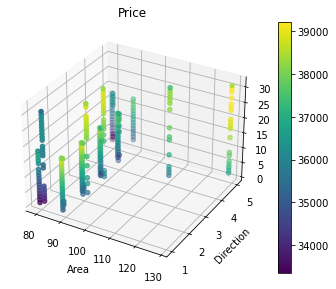

In [9]:
x = data['area'].values
y = data['direction'].values
z = data['floor'].values
price = data['price'].values
pre_price = data['pre_price'].values

plot_3d(x, y, z, price, title='Price')

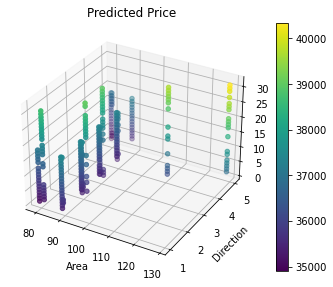

In [10]:
plot_3d(x, y, z, pre_price, title='Predicted Price')